In [1]:
import os
import sys
import yaml
import copy
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu
#import verif_utils as vu

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
fn = '/glade/derecho/scratch/ksha/EPRI_data/CESM2_detrend/ACC_annual.zarr'
ds_ACC_all = xr.open_zarr(fn)

In [6]:
x = ds_ACC_all['lon'].values
y = ds_ACC_all['lat'].values
lon, lat = np.meshgrid(x, y)

In [ ]:
leads = [0, 1, 4, 9]
vmin, vmax = 0.0, 0.6
cmap = gu.precip_cmap(return_rgb=False, land_map=False)

### 2-m Temp mean

In [7]:
TREFHT = ds_ACC_all['TREFHT_mean'].values

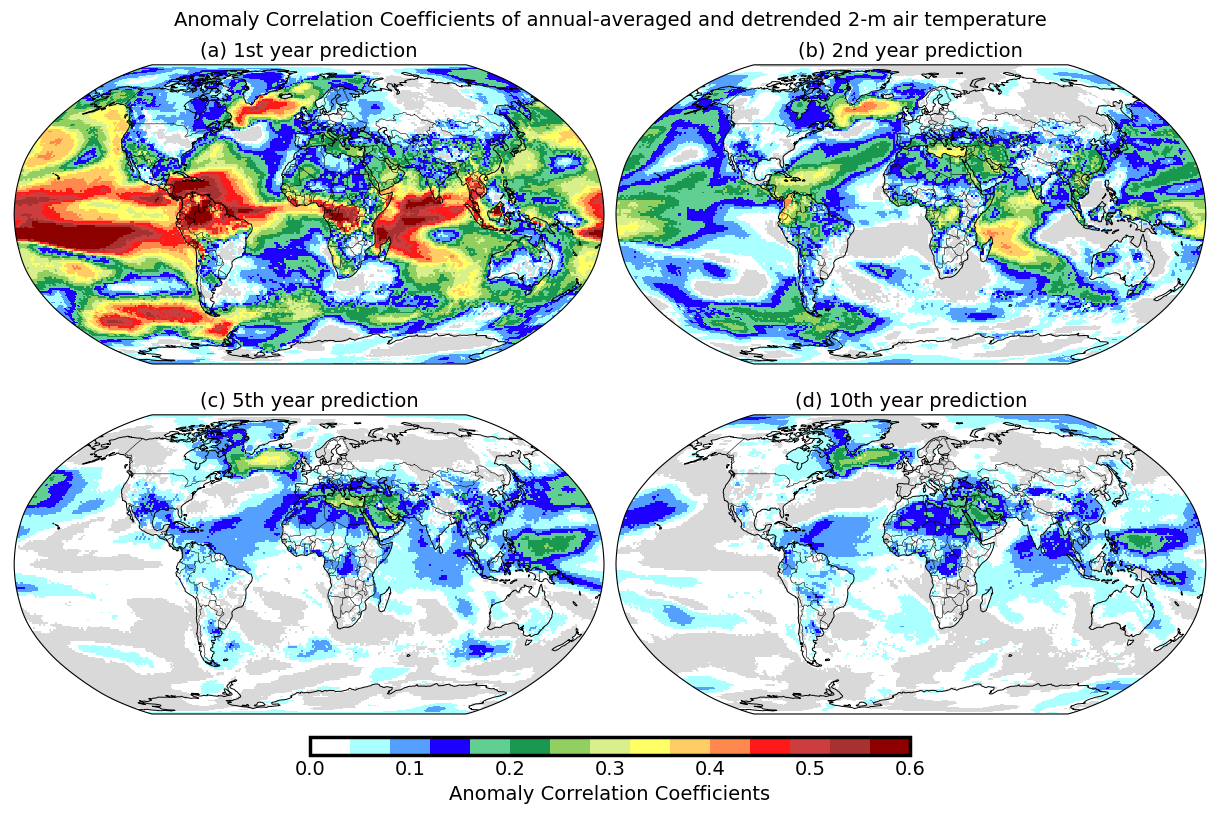

In [13]:
proj = ccrs.Robinson()
data_crs = ccrs.PlateCarree()   # lon/lat are in geographic coords

fig, axes = plt.subplots(
    2, 2, figsize=(12, 7),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

CS = None
AX = axes.ravel()

for ax, lead in zip(AX, leads):
    ax.set_global()
    ax.coastlines(linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    ax.add_feature(cfeature.LAND, facecolor="none", edgecolor="none", alpha=0.0)

    field = TREFHT[lead, ...].mean(axis=0)

    CS = ax.pcolormesh(
        lon, lat, field,
        transform=data_crs,
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    
cax = fig.add_axes([0.25, -0.025, 0.5, 0.025])  # <- adjust width (0.5) as needed

CBar = fig.colorbar(CS, orientation="horizontal", cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
CBar.set_label("Anomaly Correlation Coefficients", fontsize=14)

AX[0].set_title("(a) 1st year prediction", fontsize=14)
AX[1].set_title("(b) 2nd year prediction", fontsize=14)
AX[2].set_title("(c) 5th year prediction", fontsize=14)
AX[3].set_title("(d) 10th year prediction", fontsize=14)

ax_title1 = fig.add_axes([0.0, 1.01, 1.0, 0.03])
ax_title1.text(
    0.5, 0.5, 
    'Anomaly Correlation Coefficients of annual-averaged and detrended 2-m air temperature', 
    fontsize=14, va='center', ha='center', transform=ax_title1.transAxes
)

ax_title1.set_axis_off()

### 2-m Temp max

In [14]:
TREFHT = ds_ACC_all['TREFHT_max'].values

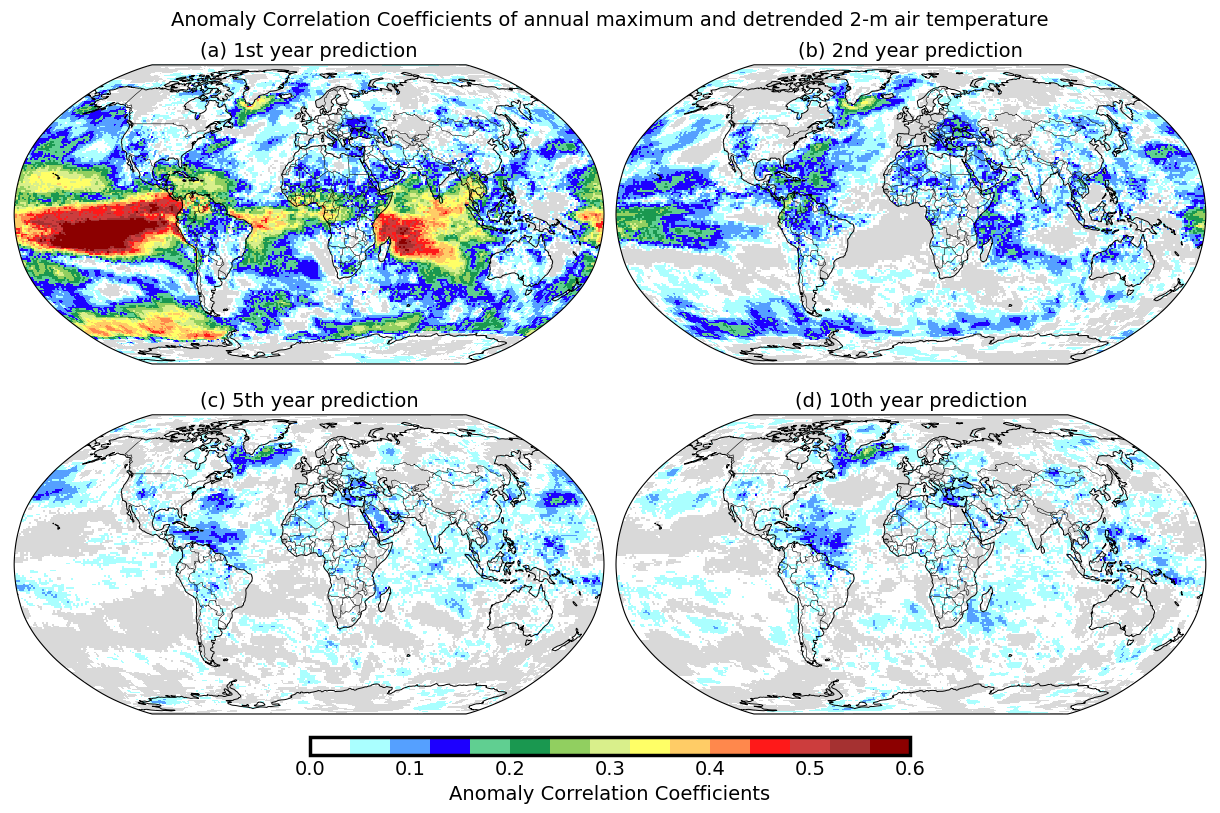

In [16]:
proj = ccrs.Robinson()
data_crs = ccrs.PlateCarree()   # lon/lat are in geographic coords

fig, axes = plt.subplots(
    2, 2, figsize=(12, 7),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

CS = None
AX = axes.ravel()

for ax, lead in zip(AX, leads):
    ax.set_global()
    ax.coastlines(linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    ax.add_feature(cfeature.LAND, facecolor="none", edgecolor="none", alpha=0.0)

    field = TREFHT[lead, ...].mean(axis=0)

    CS = ax.pcolormesh(
        lon, lat, field,
        transform=data_crs,
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    
cax = fig.add_axes([0.25, -0.025, 0.5, 0.025])  # <- adjust width (0.5) as needed

CBar = fig.colorbar(CS, orientation="horizontal", cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
CBar.set_label("Anomaly Correlation Coefficients", fontsize=14)

AX[0].set_title("(a) 1st year prediction", fontsize=14)
AX[1].set_title("(b) 2nd year prediction", fontsize=14)
AX[2].set_title("(c) 5th year prediction", fontsize=14)
AX[3].set_title("(d) 10th year prediction", fontsize=14)

ax_title1 = fig.add_axes([0.0, 1.01, 1.0, 0.03])
ax_title1.text(
    0.5, 0.5, 
    'Anomaly Correlation Coefficients of annual maximum and detrended 2-m air temperature', 
    fontsize=14, va='center', ha='center', transform=ax_title1.transAxes
)

ax_title1.set_axis_off()

### 2-m Temp min

In [17]:
TREFHT = ds_ACC_all['TREFHT_min'].values

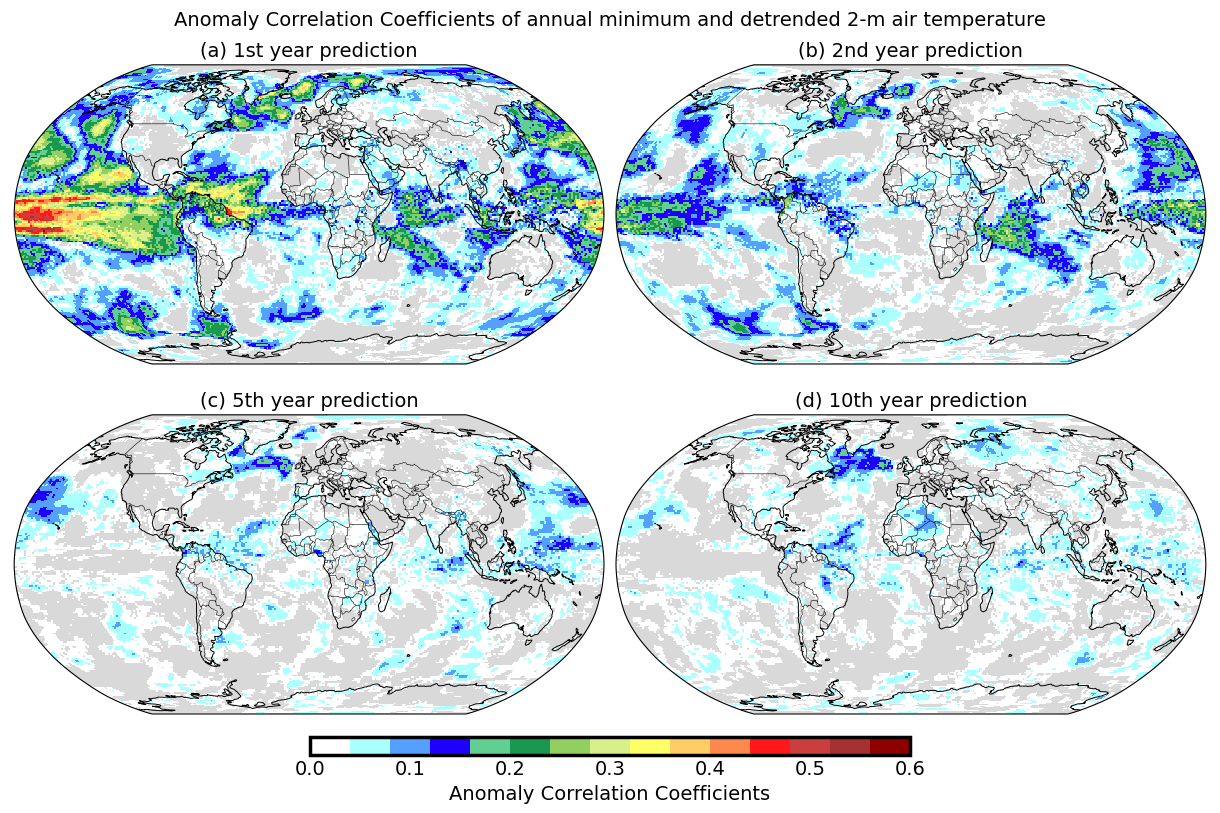

In [19]:
proj = ccrs.Robinson()
data_crs = ccrs.PlateCarree()   # lon/lat are in geographic coords

fig, axes = plt.subplots(
    2, 2, figsize=(12, 7),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

CS = None
AX = axes.ravel()

for ax, lead in zip(AX, leads):
    ax.set_global()
    ax.coastlines(linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    ax.add_feature(cfeature.LAND, facecolor="none", edgecolor="none", alpha=0.0)

    field = TREFHT[lead, ...].mean(axis=0)

    CS = ax.pcolormesh(
        lon, lat, field,
        transform=data_crs,
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    
cax = fig.add_axes([0.25, -0.025, 0.5, 0.025])  # <- adjust width (0.5) as needed

CBar = fig.colorbar(CS, orientation="horizontal", cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
CBar.set_label("Anomaly Correlation Coefficients", fontsize=14)

AX[0].set_title("(a) 1st year prediction", fontsize=14)
AX[1].set_title("(b) 2nd year prediction", fontsize=14)
AX[2].set_title("(c) 5th year prediction", fontsize=14)
AX[3].set_title("(d) 10th year prediction", fontsize=14)

ax_title1 = fig.add_axes([0.0, 1.01, 1.0, 0.03])
ax_title1.text(
    0.5, 0.5, 
    'Anomaly Correlation Coefficients of annual minimum and detrended 2-m air temperature', 
    fontsize=14, va='center', ha='center', transform=ax_title1.transAxes
)

ax_title1.set_axis_off()

### TP mean

In [20]:
PRECT = ds_ACC_all['PRECT_mean'].values

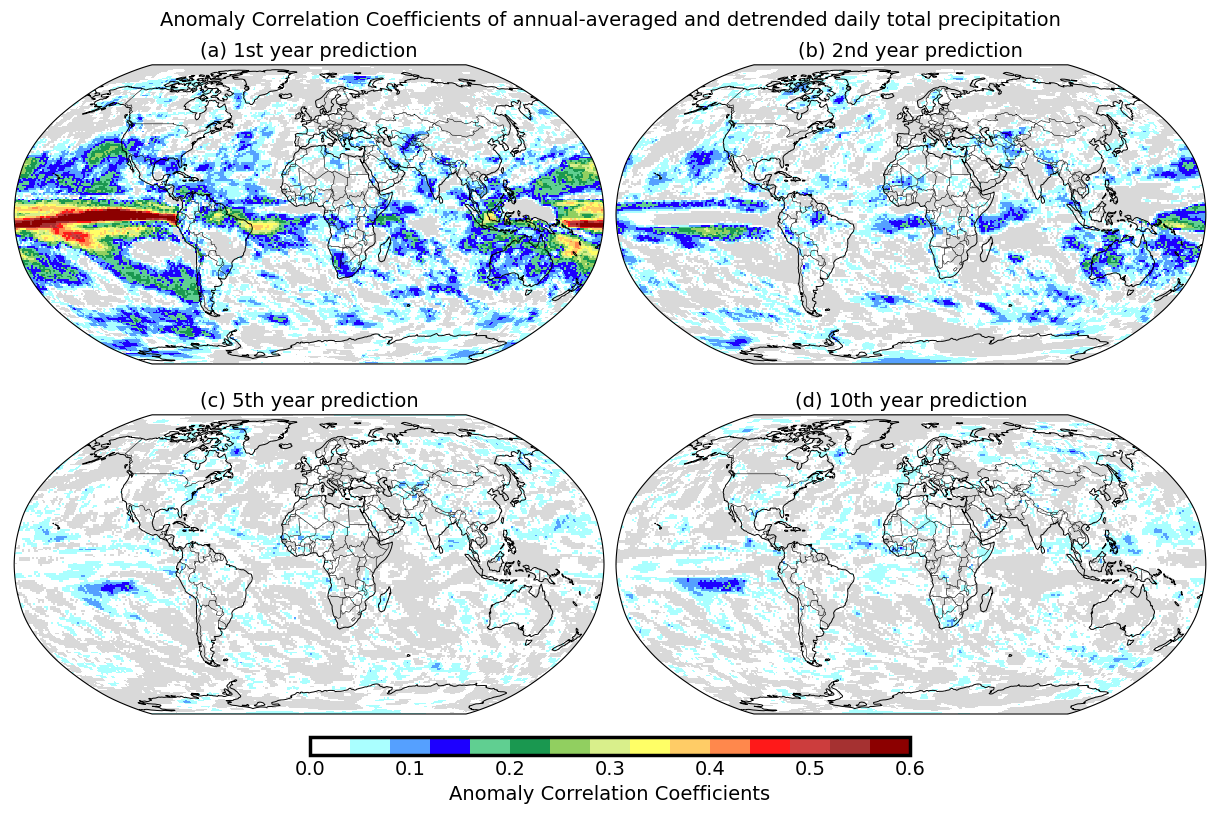

In [21]:
proj = ccrs.Robinson()
data_crs = ccrs.PlateCarree()   # lon/lat are in geographic coords

fig, axes = plt.subplots(
    2, 2, figsize=(12, 7),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

CS = None
AX = axes.ravel()

for ax, lead in zip(AX, leads):
    ax.set_global()
    ax.coastlines(linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    ax.add_feature(cfeature.LAND, facecolor="none", edgecolor="none", alpha=0.0)

    field = PRECT[lead, ...].mean(axis=0)

    CS = ax.pcolormesh(
        lon, lat, field,
        transform=data_crs,
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    
cax = fig.add_axes([0.25, -0.025, 0.5, 0.025])  # <- adjust width (0.5) as needed

CBar = fig.colorbar(CS, orientation="horizontal", cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
CBar.set_label("Anomaly Correlation Coefficients", fontsize=14)

AX[0].set_title("(a) 1st year prediction", fontsize=14)
AX[1].set_title("(b) 2nd year prediction", fontsize=14)
AX[2].set_title("(c) 5th year prediction", fontsize=14)
AX[3].set_title("(d) 10th year prediction", fontsize=14)

ax_title1 = fig.add_axes([0.0, 1.01, 1.0, 0.03])
ax_title1.text(
    0.5, 0.5, 
    'Anomaly Correlation Coefficients of annual-averaged and detrended daily total precipitation', 
    fontsize=14, va='center', ha='center', transform=ax_title1.transAxes
)

ax_title1.set_axis_off()

In [22]:
PRECT = ds_ACC_all['PRECT_max'].values

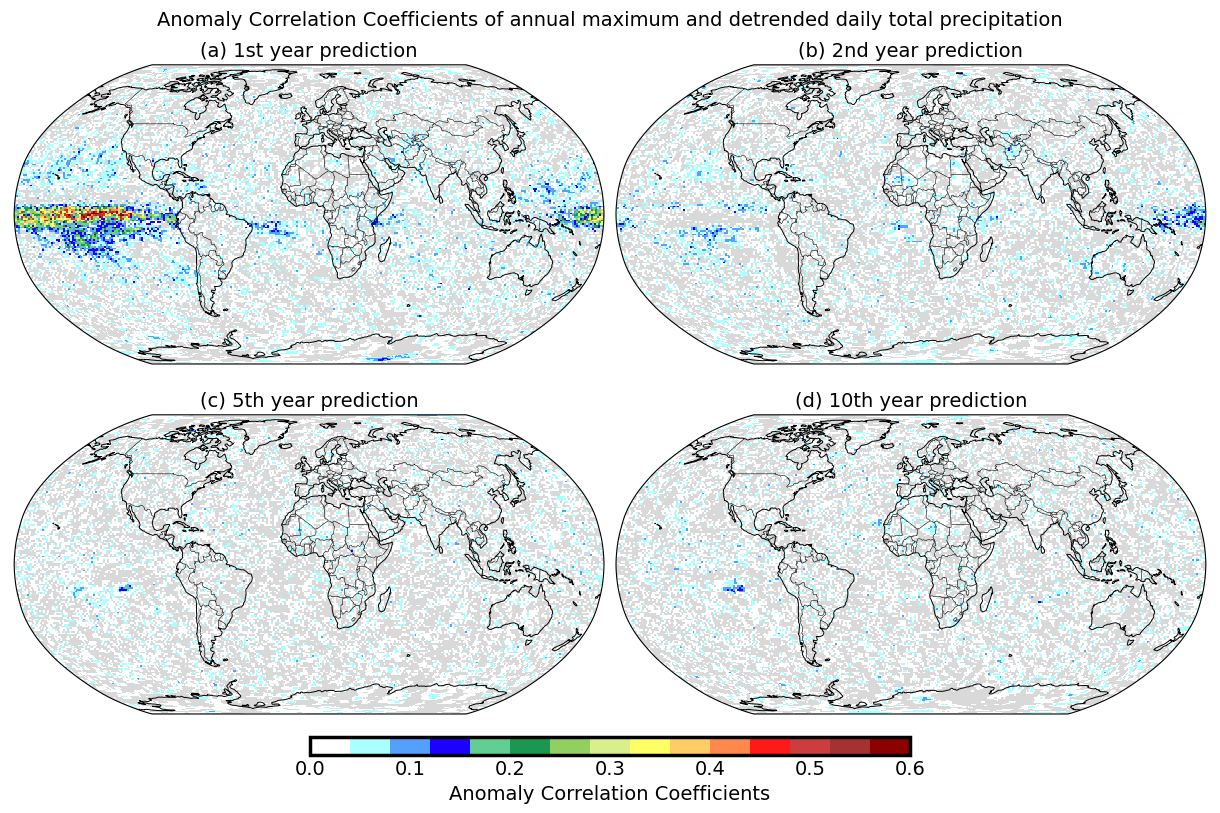

In [23]:
proj = ccrs.Robinson()
data_crs = ccrs.PlateCarree()   # lon/lat are in geographic coords

fig, axes = plt.subplots(
    2, 2, figsize=(12, 7),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

CS = None
AX = axes.ravel()

for ax, lead in zip(AX, leads):
    ax.set_global()
    ax.coastlines(linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    ax.add_feature(cfeature.LAND, facecolor="none", edgecolor="none", alpha=0.0)

    field = PRECT[lead, ...].mean(axis=0)

    CS = ax.pcolormesh(
        lon, lat, field,
        transform=data_crs,
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    
cax = fig.add_axes([0.25, -0.025, 0.5, 0.025])  # <- adjust width (0.5) as needed

CBar = fig.colorbar(CS, orientation="horizontal", cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
CBar.set_label("Anomaly Correlation Coefficients", fontsize=14)

AX[0].set_title("(a) 1st year prediction", fontsize=14)
AX[1].set_title("(b) 2nd year prediction", fontsize=14)
AX[2].set_title("(c) 5th year prediction", fontsize=14)
AX[3].set_title("(d) 10th year prediction", fontsize=14)

ax_title1 = fig.add_axes([0.0, 1.01, 1.0, 0.03])
ax_title1.text(
    0.5, 0.5, 
    'Anomaly Correlation Coefficients of annual maximum and detrended daily total precipitation', 
    fontsize=14, va='center', ha='center', transform=ax_title1.transAxes
)

ax_title1.set_axis_off()